In [34]:
import uproot
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak


In [35]:
file_path = "../../BDT_Compare/dijet_pythia_mc16a.root"
file = uproot.open(file_path)

In [36]:
for k in file.keys():
    if k.startswith('500_'):
        print(k)

500_LeadingJet_Forward_Gluon_pt;1
500_LeadingJet_Forward_Gluon_pt_err;1
500_LeadingJet_Forward_Gluon_eta;1
500_LeadingJet_Forward_Gluon_eta_err;1
500_LeadingJet_Forward_Gluon_ntrk;1
500_LeadingJet_Forward_Gluon_ntrk_err;1
500_LeadingJet_Forward_Gluon_width;1
500_LeadingJet_Forward_Gluon_width_err;1
500_LeadingJet_Forward_Gluon_c1;1
500_LeadingJet_Forward_Gluon_c1_err;1
500_LeadingJet_Forward_Gluon_bdt;1
500_LeadingJet_Forward_Gluon_bdt_err;1
500_LeadingJet_Forward_Gluon_newBDT;1
500_LeadingJet_Forward_Gluon_newBDT_err;1
500_LeadingJet_Forward_Quark_pt;1
500_LeadingJet_Forward_Quark_pt_err;1
500_LeadingJet_Forward_Quark_eta;1
500_LeadingJet_Forward_Quark_eta_err;1
500_LeadingJet_Forward_Quark_ntrk;1
500_LeadingJet_Forward_Quark_ntrk_err;1
500_LeadingJet_Forward_Quark_width;1
500_LeadingJet_Forward_Quark_width_err;1
500_LeadingJet_Forward_Quark_c1;1
500_LeadingJet_Forward_Quark_c1_err;1
500_LeadingJet_Forward_Quark_bdt;1
500_LeadingJet_Forward_Quark_bdt_err;1
500_LeadingJet_Forward_Quark

In [37]:
pt = 500
var = 'ntrk' 
label_pt = ["LeadingJet", "SubJet"]
label_eta = ["Forward", "Central"]
label_type = ["Gluon", "Quark"]

In [38]:
HistMap = {}
for i, l_pt  in enumerate(label_pt):
    for j, l_eta in enumerate(label_eta):
        for k, l_type in enumerate(label_type):
            key = str(pt) + "_" + l_pt + "_" + l_eta + "_" + l_type + "_" + var
            HistMap[key] = file[key].to_numpy()



In [39]:
file['500_LeadingJet_Forward_Gluon_ntrk'].to_numpy()
file['500_LeadingJet_Forward_Quark_ntrk'].to_numpy()
file['500_LeadingJet_Central_Gluon_ntrk'].to_numpy()
file['500_LeadingJet_Central_Gluon_ntrk'].to_numpy()
file['500_SubJet_Forward_Gluon_ntrk'].to_numpy()
file['500_SubJet_Forward_Quark_ntrk'].to_numpy()
file['500_SubJet_Central_Gluon_ntrk'].to_numpy()
file['500_SubJet_Central_Gluon_ntrk'].to_numpy()



(array([8.79185528e+01, 1.50770961e+02, 2.70502657e+02, 5.16003807e+02,
        9.45115273e+02, 1.85910769e+03, 3.28693129e+03, 5.63062332e+03,
        8.71816123e+03, 1.35433192e+04, 1.94575373e+04, 2.74610598e+04,
        3.74724877e+04, 4.80570250e+04, 5.95891424e+04, 7.17109038e+04,
        8.24001932e+04, 9.19078526e+04, 9.93296178e+04, 1.05246337e+05,
        1.08186986e+05, 1.09478748e+05, 1.08338877e+05, 1.05730648e+05,
        1.01232195e+05, 9.61063117e+04, 9.04417368e+04, 8.30525731e+04,
        7.62108131e+04, 6.92861427e+04, 6.22176021e+04, 5.50703420e+04,
        4.83439910e+04, 4.20380943e+04, 3.64760406e+04, 3.11087171e+04,
        2.67481266e+04, 2.27734852e+04, 1.87684749e+04, 1.57085786e+04,
        1.27396571e+04, 1.07025358e+04, 8.65076448e+03, 6.86377255e+03,
        5.41733749e+03, 4.33122113e+03, 3.41498079e+03, 2.68108231e+03,
        2.05049935e+03, 1.52507666e+03, 1.18436776e+03, 8.99034282e+02,
        7.17567020e+02, 5.78040192e+02, 3.74279960e+02, 3.161110

In [40]:
HistMap.keys()

dict_keys(['500_LeadingJet_Forward_Gluon_ntrk', '500_LeadingJet_Forward_Quark_ntrk', '500_LeadingJet_Central_Gluon_ntrk', '500_LeadingJet_Central_Quark_ntrk', '500_SubJet_Forward_Gluon_ntrk', '500_SubJet_Forward_Quark_ntrk', '500_SubJet_Central_Gluon_ntrk', '500_SubJet_Central_Quark_ntrk'])

In [41]:
HistMap['500_LeadingJet_Central_Gluon_ntrk'][0].shape

(60,)

In [42]:
## Construct data-like MC 
Higher = np.zeros((60))
Lower = np.zeros((60))
for k, v in HistMap.items():
    if k.__contains__('Forward'):
        Higher += v[0]
    elif k.__contains__('Central'):
        Lower += v[0]

In [43]:
Quark = np.zeros((60))
Gluon = np.zeros((60))
for k, v in HistMap.items():
    if k.__contains__('Quark'):
        Quark += v[0]
    elif k.__contains__('Gluon'):
        Gluon += v[0]

In [44]:
Higher_Quark = np.zeros((60))
Higher_Gluon = np.zeros((60))
Lower_Quark = np.zeros((60))
Lower_Gluon = np.zeros((60))

for k, v in HistMap.items():
    if k.__contains__('Quark') and k.__contains__('Forward'):
        Higher_Quark += v[0]
    elif k.__contains__('Gluon') and k.__contains__('Forward'):
        Higher_Gluon += v[0]
    elif k.__contains__('Quark') and k.__contains__('Central'):
        Lower_Quark += v[0]
    elif k.__contains__('Gluon') and k.__contains__('Central'):
        Lower_Gluon += v[0]

In [45]:
frac_Higher_Quark = np.sum(Higher_Quark) / np.sum(Higher)
frac_Lower_Quark = np.sum(Lower_Quark) / np.sum(Lower)

frac_Higher_Gluon = 1 - frac_Higher_Quark
frac_Lower_Gluon = 1 - frac_Lower_Quark

In [46]:
f = np.array([[frac_Higher_Quark,  frac_Higher_Gluon], [frac_Lower_Quark, frac_Lower_Gluon]])

In [47]:
f

array([[0.55881692, 0.44118308],
       [0.40872039, 0.59127961]])

In [48]:
f_inv = np.linalg.inv(f)

In [49]:
# normalize 
p_Q = Quark / np.sum(Quark)
p_G = Gluon / np.sum(Gluon)

p_H = Higher / np.sum(Higher)
p_L = Lower / np.sum(Lower)


In [50]:
bin_edges = np.linspace(0.5,59.5,60)

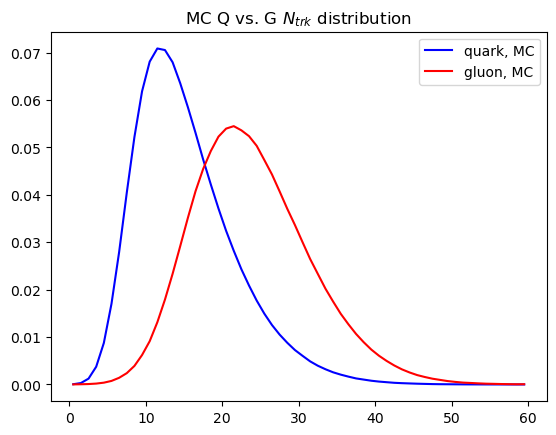

In [51]:
plt.plot(bin_edges, p_Q, color='blue', label = 'quark, MC')
plt.plot(bin_edges, p_G, color='red', label = 'gluon, MC' )
plt.legend()
plt.title(r"MC Q vs. G $N_{trk}$ distribution")
plt.savefig("MC_truth_Q_G.jpg", dpi=300)
plt.show()

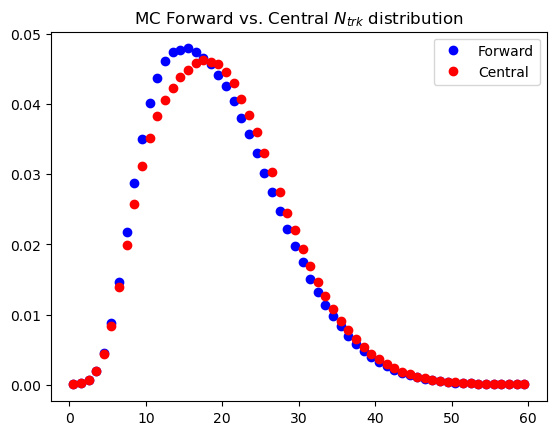

In [52]:
plt.plot(bin_edges, p_H, 'bo', label = 'Forward')
plt.plot(bin_edges, p_L, 'ro', label = 'Central' )
plt.legend()
plt.title(r"MC Forward vs. Central $N_{trk}$ distribution")
plt.savefig("MC_truth_Q_G_forward_ntrk.jpg", dpi=300)
plt.show()

In [53]:
extract_p_Q = f_inv[0][0] * p_H + f_inv[0][1]* p_L 
extract_p_G = f_inv[1][0] * p_H + f_inv[1][1]* p_L 


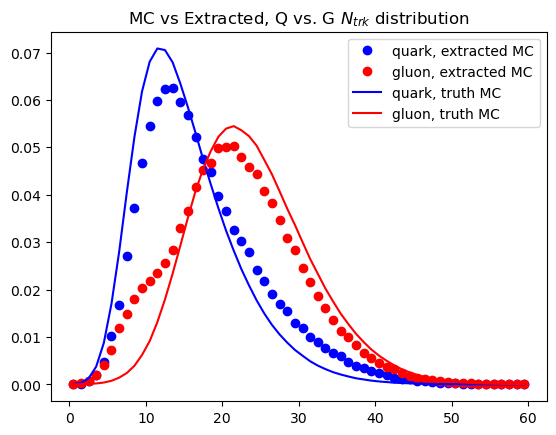

In [54]:
plt.plot(bin_edges, extract_p_Q, 'bo', label = 'quark, extracted MC')
plt.plot(bin_edges, extract_p_G, 'ro', label = 'gluon, extracted MC' )

plt.plot(bin_edges, p_Q, color='blue', label = 'quark, truth MC')
plt.plot(bin_edges, p_G, color='red', label = 'gluon, truth MC' )

plt.legend()
plt.title(r"MC vs Extracted, Q vs. G $N_{trk}$ distribution")
plt.savefig("MC_truth_Extracted_Q_G_ntrk.jpg", dpi=300)

plt.show()

In [55]:
p_H_Q = Higher_Quark / np.sum(Higher_Quark)
p_L_Q = Lower_Quark / np.sum(Lower_Quark)
p_H_G = Higher_Gluon / np.sum(Higher_Gluon)
p_L_G = Lower_Gluon / np.sum(Lower_Gluon)


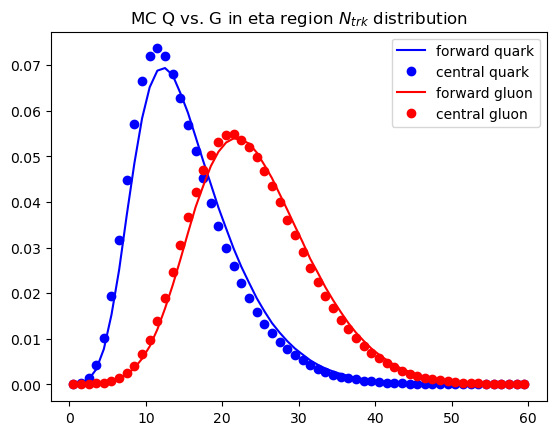

In [56]:
plt.plot(bin_edges, p_H_Q, 'blue', label = 'forward quark')
plt.plot(bin_edges, p_L_Q, 'bo', label = 'central quark' )

plt.plot(bin_edges, p_H_G , 'red', label = 'forward gluon')
plt.plot(bin_edges, p_L_G , 'ro', label = 'central gluon' )

plt.legend()

plt.title(r"MC Q vs. G in eta region $N_{trk}$ distribution")
plt.savefig("MC_truth_Q_G_eta_ntrk.jpg", dpi=300)
plt.show()

## Reweighting

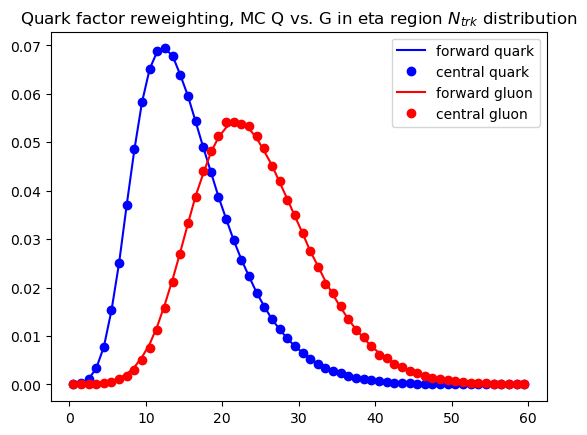

In [57]:
quark_factor = p_H_Q / p_L_Q
p_L_Q_weighted = Lower_Quark * quark_factor / np.sum(Lower_Quark * quark_factor)
p_L_G_weighted = Lower_Gluon * quark_factor / np.sum(Lower_Gluon * quark_factor)

plt.plot(bin_edges, p_H_Q, 'blue', label = 'forward quark')
plt.plot(bin_edges, p_L_Q_weighted, 'bo', label = 'central quark' )

plt.plot(bin_edges, p_H_G , 'red', label = 'forward gluon')
plt.plot(bin_edges, p_L_G_weighted, 'ro', label = 'central gluon' )

plt.legend()

plt.title(r"Quark factor reweighting, MC Q vs. G in eta region $N_{trk}$ distribution")
plt.savefig("Quark_factor_MC_truth_Q_G_eta_ntrk.jpg", dpi=300)

plt.show()

In [58]:
quark_factor

array([0.62994274, 0.75714019, 0.76994074, 0.76226141, 0.76654844,
       0.78917054, 0.79147397, 0.82740858, 0.84953034, 0.87566829,
       0.9041258 , 0.93399813, 0.96243746, 0.99678702, 1.01687883,
       1.04787378, 1.05968391, 1.0834435 , 1.10476028, 1.11305901,
       1.1439642 , 1.14135238, 1.16041779, 1.18316056, 1.18493237,
       1.20481605, 1.19756027, 1.21720572, 1.2148525 , 1.22988876,
       1.24015084, 1.24561684, 1.25253207, 1.24097071, 1.30311135,
       1.32655785, 1.28833002, 1.29081372, 1.34171821, 1.3126167 ,
       1.24283599, 1.3692402 , 1.25739963, 1.38786004, 1.34469136,
       1.46187694, 1.40743866, 1.31564982, 1.31982027, 1.466156  ,
       1.48509909, 1.47361798, 1.54622216, 1.28049334, 1.97112051,
       1.45352091, 1.02259818, 0.93063131, 0.41252113, 1.23537278])

In [59]:
p_L_weighted = Lower * quark_factor / np.sum(Lower * quark_factor)
extract_p_Q_reweight = f_inv[0][0] * p_H + f_inv[0][1]* p_L_weighted
extract_p_G_reweight = f_inv[1][0] * p_H + f_inv[1][1]* p_L_weighted


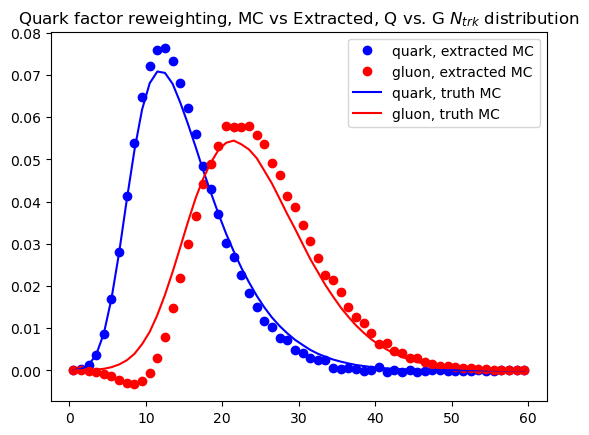

In [60]:
plt.plot(bin_edges, extract_p_Q_reweight, 'bo', label = 'quark, extracted MC')
plt.plot(bin_edges, extract_p_G_reweight, 'ro', label = 'gluon, extracted MC' )

plt.plot(bin_edges, p_Q, color='blue', label = 'quark, truth MC')
plt.plot(bin_edges, p_G, color='red', label = 'gluon, truth MC' )

plt.legend()

plt.title(r"Quark factor reweighting, MC vs Extracted, Q vs. G $N_{trk}$ distribution")
plt.savefig("Quark_factor_MC_truth_Extracted_Q_G_ntrk.jpg", dpi=300)

plt.show()

In [61]:
extract_p_G_reweight

array([ 2.37677232e-05,  2.52021259e-05, -4.29713146e-05, -2.64693468e-04,
       -7.64878317e-04, -1.43929363e-03, -2.33659027e-03, -3.00891256e-03,
       -3.34115535e-03, -2.50440006e-03, -6.14794354e-04,  3.01446095e-03,
        7.85883974e-03,  1.47369343e-02,  2.18953996e-02,  3.00351064e-02,
        3.66244905e-02,  4.40954324e-02,  4.89273141e-02,  5.32064727e-02,
        5.80138273e-02,  5.77222098e-02,  5.76415456e-02,  5.78626250e-02,
        5.58304222e-02,  5.36953375e-02,  4.92026521e-02,  4.63984259e-02,
        4.12600951e-02,  3.86745590e-02,  3.43884885e-02,  3.05713986e-02,
        2.67092597e-02,  2.25057186e-02,  2.14526511e-02,  1.85023775e-02,
        1.51386730e-02,  1.26150755e-02,  1.12050033e-02,  8.81206753e-03,
        6.33287981e-03,  6.39644088e-03,  4.51829460e-03,  4.21492554e-03,
        3.04293064e-03,  2.84047016e-03,  2.04379292e-03,  1.43205670e-03,
        1.12671704e-03,  9.74046399e-04,  7.58698156e-04,  5.58073889e-04,
        4.88400644e-04,  

In [62]:
extract_p_G_reweight

array([ 2.37677232e-05,  2.52021259e-05, -4.29713146e-05, -2.64693468e-04,
       -7.64878317e-04, -1.43929363e-03, -2.33659027e-03, -3.00891256e-03,
       -3.34115535e-03, -2.50440006e-03, -6.14794354e-04,  3.01446095e-03,
        7.85883974e-03,  1.47369343e-02,  2.18953996e-02,  3.00351064e-02,
        3.66244905e-02,  4.40954324e-02,  4.89273141e-02,  5.32064727e-02,
        5.80138273e-02,  5.77222098e-02,  5.76415456e-02,  5.78626250e-02,
        5.58304222e-02,  5.36953375e-02,  4.92026521e-02,  4.63984259e-02,
        4.12600951e-02,  3.86745590e-02,  3.43884885e-02,  3.05713986e-02,
        2.67092597e-02,  2.25057186e-02,  2.14526511e-02,  1.85023775e-02,
        1.51386730e-02,  1.26150755e-02,  1.12050033e-02,  8.81206753e-03,
        6.33287981e-03,  6.39644088e-03,  4.51829460e-03,  4.21492554e-03,
        3.04293064e-03,  2.84047016e-03,  2.04379292e-03,  1.43205670e-03,
        1.12671704e-03,  9.74046399e-04,  7.58698156e-04,  5.58073889e-04,
        4.88400644e-04,  

In [63]:
np.sum(extract_p_Q_reweight)

0.9999999999999987

In [64]:
extract_p_Q

array([-2.63570266e-05,  1.08869864e-04,  6.22146362e-04,  1.95159804e-03,
        4.80695749e-03,  1.01172229e-02,  1.67973592e-02,  2.71121351e-02,
        3.72091649e-02,  4.67019727e-02,  5.45238791e-02,  5.97212168e-02,
        6.22337326e-02,  6.25951456e-02,  5.94659165e-02,  5.68579261e-02,
        5.22249153e-02,  4.76077570e-02,  4.47796433e-02,  3.97561982e-02,
        3.66441855e-02,  3.26140054e-02,  3.02516356e-02,  2.78709278e-02,
        2.41364921e-02,  2.18405100e-02,  1.90590944e-02,  1.70438041e-02,
        1.53687817e-02,  1.30173305e-02,  1.18828091e-02,  9.96925712e-03,
        8.95461350e-03,  7.63191933e-03,  6.66194183e-03,  6.01908830e-03,
        4.62142312e-03,  3.87920641e-03,  3.46458253e-03,  2.77383423e-03,
        2.30729845e-03,  1.92302839e-03,  1.25718021e-03,  1.20112792e-03,
        1.03667846e-03,  7.96929564e-04,  6.64203869e-04,  4.32922627e-04,
        3.48212869e-04,  3.22780868e-04,  2.39896367e-04,  1.62782636e-04,
        1.32758623e-04,  

In [65]:
# Truth ROC 
x=np.empty(60)
y=np.empty(60)
u=np.empty(60)
v=np.empty(60)
for i in range(60):
   x[i] = np.sum(p_Q[bin_edges<i])
   y[i] = 1- np.sum(p_G[bin_edges<i])

   u[i] = np.sum(extract_p_Q[bin_edges < i])
   v[i] = 1 - np.sum(extract_p_G[bin_edges < i])

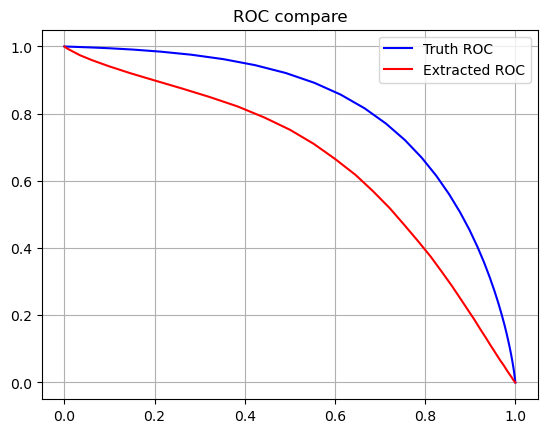

In [66]:
plt.plot(x,y, "blue", label = "Truth ROC")
plt.plot(u,v, "red", label = "Extracted ROC")
plt.grid()
plt.legend()
plt.title("ROC compare")
plt.savefig("ROC_com.jpg",dpi = 300)